In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [239]:
df = pd.read_csv("SVMdataset.csv")


In [240]:
df.head()


,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [241]:
x=df.iloc[:,:-1].values
y=df.iloc[:,2].values

In [242]:
X_train, X1, y_train, y1 = train_test_split(x, y, train_size=0.6,random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X1, y1, train_size=0.5,random_state=0)

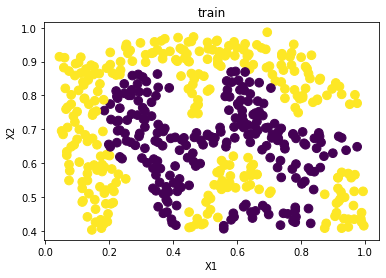

In [243]:
plt.scatter(X_train[:,0],X_train[:,1],s=75,c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('train')
plt.show()

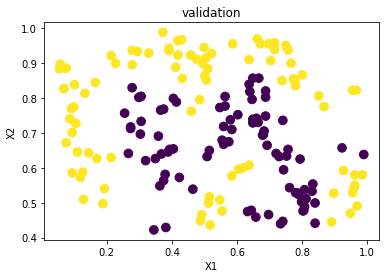

In [244]:
plt.scatter(X_valid[:,0],X_valid[:,1],s=75,c=y_valid)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('validation')
plt.show()

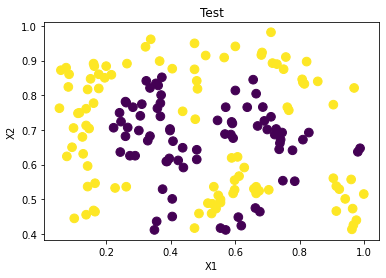

In [245]:
plt.scatter(X_test[:,0],X_test[:,1],s=75,c=y_test)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Test')
plt.show()

In [246]:
c=np.zeros(20)
l=0
i=1500
while l<20:
    c[l]=i
    i/=2
    l+=1
##--------------------------------------    
c_better=1500
cl = SVC(kernel='linear',C=c_better)
cl.fit(X_train, y_train)
y_valid_pred=cl.predict(X_valid)
f_better =metrics.f1_score(y_valid,y_valid_pred)
for ii in c:
    clf = SVC(kernel='linear',C=ii)
    clf.fit(X_train, y_train)
    y_valid_pred=clf.predict(X_valid)
    f =metrics.f1_score(y_valid,y_valid_pred)
    if f_better<f:
        f_better=f
        c_better=ii

clf = SVC(kernel='linear',C=c_better)
clf.fit(X_train, y_train)

SVC(C=1.46484375, kernel='linear')

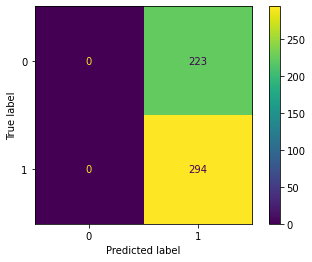

In [247]:
metrics.plot_confusion_matrix(clf, X_train, y_train)

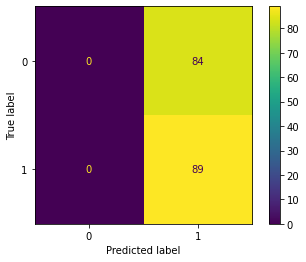

In [248]:
metrics.plot_confusion_matrix(clf, X_valid, y_valid)

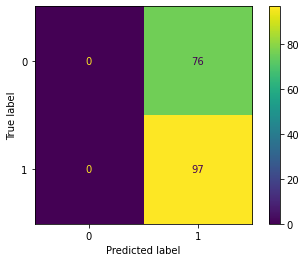

In [249]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

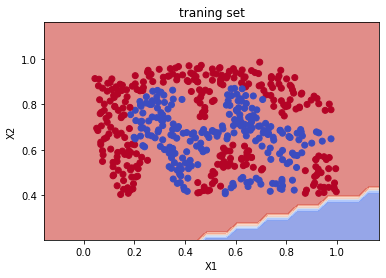

In [250]:
h = 0.04
x_min,x_max=X_train[:, 0].min()- 0.2,X_train[:, 0].max()+0.2
y_min,y_max=X_train[:, 1].min()- 0.2,X_train[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z=clf.predict(np.c_[xs.ravel(),ys.ravel()])
Z=Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_train[:, 0],X_train[:, 1],c=y_train,cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('traning set')
plt.show()

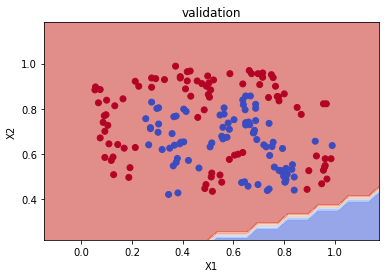

In [251]:
h=0.04
x_min,x_max=X_valid[:, 0].min()-0.2,X_valid[:, 0].max()+0.2
y_min,y_max=X_valid[:, 1].min()-0.2,X_valid[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z = clf.predict(np.c_[xs.ravel(), ys.ravel()])
Z = Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm,alpha=0.6)
plt.scatter(X_valid[:, 0],X_valid[:, 1],c=y_valid, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('validation')
plt.show()

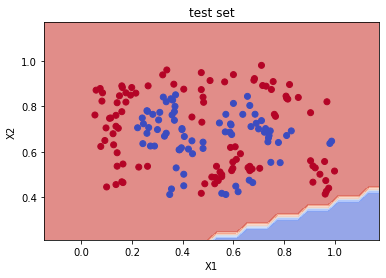

In [252]:
h=0.04
x_min,x_max=X_test[:, 0].min()-0.2,X_test[:, 0].max()+0.2
y_min,y_max= X_test[:, 1].min()-0.2, X_test[:, 1].max()+0.2
xs,ys=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
Z=clf.predict(np.c_[xs.ravel(),ys.ravel()])
Z = Z.reshape(xs.shape)
plt.contourf(xs,ys,Z,cmap=plt.cm.coolwarm,alpha=0.6)
plt.scatter(X_test[:, 0],X_test[:, 1],c=y_test,cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('test set')
plt.show()

In [253]:
print('trainig')
y_pre=clf.predict(X_train)
acc =metrics.accuracy_score(y_train,y_pre)
print("Accu=",acc)
f1 =metrics.f1_score(y_train,y_pre)
print("F1 score=",f1)
precision =metrics.precision_score(y_train,y_pre)
print("Preci=",precision)
recall=metrics.recall_score(y_train,y_pre)
print("recall=",recall)
print('--------------------------------------------------')
print('testing')
Y_predicit_test=clf.predict(X_test)
acc =metrics.accuracy_score(y_test,Y_predicit_test)
print("Accu = ",acc)
f1 =metrics.f1_score(y_test,Y_predicit_test)
print("F1 score=",f1)
precision =metrics.precision_score(y_test,Y_predicit_test)
print("Preci=",precision)
recall=metrics.recall_score(y_test,Y_predicit_test)
print("recall=",recall)
print('--------------------------------------------------')
print('validation')
Y_valid=clf.predict(X_valid)
acc =metrics.accuracy_score(y_valid,Y_valid)
print("Accu=",acc)
f1 =metrics.f1_score(y_valid,Y_valid)
print("F1 score=",f1)
precision =metrics.precision_score(y_valid,Y_valid)
print("Preci=",precision)
recall=metrics.recall_score(y_valid,Y_valid)
print("recall=",recall)

trainig
Accu= 0.5686653771760155
F1 score= 0.7250308261405672
Preci= 0.5686653771760155
recall= 1.0
--------------------------------------------------
testing
Accu =  0.5606936416184971
F1 score= 0.7185185185185186
Preci= 0.5606936416184971
recall= 1.0
--------------------------------------------------
validation
Accu= 0.5144508670520231
F1 score= 0.6793893129770993
Preci= 0.5144508670520231
recall= 1.0
